# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Фиксируем для того, чтобы обеспечить воспроизводимость результатов при повторных запусках ячеек ноутбука. Когда фиксируем random.seed, то каждый раз генерируются один и тот же набор "случайных" чисел.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [31]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

Отобразите 10 случайных строк тренировочного датасета

In [32]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6973,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2638,Maruti Wagon R VXI,2006,135000,62900,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4256,Maruti Swift Dzire VDI,2019,675000,25000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
5699,Maruti Swift Dzire ZDI,2018,780000,30000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2629,Maruti Omni E MPI STD BS IV,2016,190000,80000,Petrol,Individual,Manual,Second Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
5512,Tata Indica V2 LSi,2008,85000,25000,Petrol,Individual,Manual,Second Owner,16.84 kmpl,1193 CC,64.4 bhp,99.8Nm@ 2700rpm,5.0
4885,Tata Nano Twist XE,2015,110000,15000,Petrol,Individual,Manual,First Owner,25.4 kmpl,624 CC,37.5 bhp,51Nm@ 4000+/-500rpm,4.0
1964,Maruti Omni 8 Seater BSII,2010,130000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,8.0
2343,Ford EcoSport 1.5 Ti VCT AT Titanium BSIV,2015,775000,30000,Petrol,Individual,Automatic,First Owner,15.63 kmpl,1499 CC,110.4 bhp,140Nm@ 4400rpm,5.0
5179,Mahindra TUV 300 T8,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0


Отобразите первые 5 и последние 5 объектов тестового датасета

In [34]:
df_test.head() # первые пять строк

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [35]:
df_test.tail() # последние пять строк

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения

In [36]:
# Отобразим столбцы с пропусками для обучающего датасета
def check_missing_values(df):
    for col in list(df.columns):
        nans = df[col].isna().sum()
        print(f'{col}: количество пропусков: {nans}')    
    
check_missing_values(df_train)         

name: количество пропусков: 0
year: количество пропусков: 0
selling_price: количество пропусков: 0
km_driven: количество пропусков: 0
fuel: количество пропусков: 0
seller_type: количество пропусков: 0
transmission: количество пропусков: 0
owner: количество пропусков: 0
mileage: количество пропусков: 202
engine: количество пропусков: 202
max_power: количество пропусков: 196
torque: количество пропусков: 203
seats: количество пропусков: 202


In [37]:
# Отобразим столбцы с пропусками для тестового датасета
check_missing_values(df_test)

name: количество пропусков: 0
year: количество пропусков: 0
selling_price: количество пропусков: 0
km_driven: количество пропусков: 0
fuel: количество пропусков: 0
seller_type: количество пропусков: 0
transmission: количество пропусков: 0
owner: количество пропусков: 0
mileage: количество пропусков: 19
engine: количество пропусков: 19
max_power: количество пропусков: 19
torque: количество пропусков: 19
seats: количество пропусков: 19


Посмотрите, есть ли в данных явные дубликаты

In [38]:
duplicates_train = df_train.duplicated()
duplicates_test = df_test.duplicated()
print(f'Количество дубликатов в обучающем датасете: {sum(duplicates_train)}')
print(f'Количество дубликатов в тестовом датасете: {sum(duplicates_test)}')

Количество дубликатов в обучающем датасете: 985
Количество дубликатов в тестовом датасете: 62


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [39]:
# Для того, чтобы найти медианное значение для столбцов, содержащих пропуски, нам нужно сначала привести эти столбцы к числовому типу

# Функция для преобразования столбцов, содержащих строку, к числовому типу 
def extract_numeric(x):    
    if type(x) == str:
        x = ''.join(filter(lambda y: str.isdigit(y) or y == '.', x.split()[0]))
        if x != '': 
            return float(x)
        else:
            return np.nan    
    elif type(x) == float:
        return x
    else:
        return np.nan

# столбцы, содержащие пропуски   
columns_with_nan = ['mileage', 'engine', 'max_power', 'torque', 'seats']
# список медиан, полученных из обучающего датасета
df_train_medians = []

# столбец 'seats' нам не нужен, поскольку он и так имеет тип float
for col in columns_with_nan[:-1]:    
    df_train[col] = df_train[col].apply(extract_numeric)
    df_train_medians.append(df_train[col].median())

# Дополним список медианой для столбца Seat
df_train_medians.append(df_train['seats'].median())

# Теперь очистим соответствующие столбцы тестового датасета от строковых составляющих 
for col in columns_with_nan[:-1]:    
    df_test[col] = df_test[col].apply(extract_numeric)

In [40]:
# Посмотрим на результат избавления от строковой части в данных столбцах 
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.40,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.50,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75,5.0


In [41]:
# Теперь заполним все пропуски медианными значениями из обучающего датасета
for i in range(len(columns_with_nan)):
    df_train[columns_with_nan[i]].fillna(df_train_medians[i], inplace=True)
    df_test[columns_with_nan[i]].fillna(df_train_medians[i], inplace=True)


# Проверим наличие пропусков
check_missing_values(df_train) 
check_missing_values(df_test) 

name: количество пропусков: 0
year: количество пропусков: 0
selling_price: количество пропусков: 0
km_driven: количество пропусков: 0
fuel: количество пропусков: 0
seller_type: количество пропусков: 0
transmission: количество пропусков: 0
owner: количество пропусков: 0
mileage: количество пропусков: 0
engine: количество пропусков: 0
max_power: количество пропусков: 0
torque: количество пропусков: 0
seats: количество пропусков: 0
name: количество пропусков: 0
year: количество пропусков: 0
selling_price: количество пропусков: 0
km_driven: количество пропусков: 0
fuel: количество пропусков: 0
seller_type: количество пропусков: 0
transmission: количество пропусков: 0
owner: количество пропусков: 0
mileage: количество пропусков: 0
engine: количество пропусков: 0
max_power: количество пропусков: 0
torque: количество пропусков: 0
seats: количество пропусков: 0


/tmp/ipykernel_11951/1400378196.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[columns_with_nan[i]].fillna(df_train_medians[i], inplace=True)
/tmp/ipykernel_11951/1400378196.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6999 non-null   float64
 9   engine         6999 non-null   float64
 10  max_power      6999 non-null   float64
 11  torque         6999 non-null   float64
 12  seats          6999 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 711.0+ KB


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? 

In [43]:
# создадим булеву маску, помечая все строки, являющиеся дубликатами, кроме первой как True
same_features = df_train.drop(columns='selling_price').duplicated(keep='first')
print(f'Число объектов с одинаковым признаковым описанием: {same_features.sum()}')

Число объектов с одинаковым признаковым описанием: 1159


Отобразите такие объекты 

In [44]:
df_train[same_features]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114.0,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114.0,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114.0,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430.0,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215.0,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190.0,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю 

In [45]:
# Удалим все строки, не соответствующие булевой маске same_features
df_train = df_train[~same_features]

In [46]:
df_train.shape

(5840, 13)

In [47]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Уберите единицы измерения для признаков ``mileage, engine, max_power``. \
Приведите тип данных к ``float``.

Сделано в задании 1

In [48]:
# your code here
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0


In [49]:
df_test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0


In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  torque         5840 non-null   float64
 12  seats          5840 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 638.8+ KB


Удалите столбец ``torque``

In [51]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [52]:
# your code here
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5840 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 593.1+ KB


In [53]:
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   int64  
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [54]:
# основные статистики по числовым столбцам для трейна и теста
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [55]:
# основные статистики по числовым столбцам для трейна и теста
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [56]:
# основные статистики по категориальным столбцам для трейна и теста
df_train.describe(include=object)

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [57]:
# основные статистики по категориальным столбцам для трейна и теста
df_test.describe(include=object)

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [58]:
df_train.shape

(5840, 12)

Данный assert не пройдет, т.к после удаления признака `torque` в соответствии с заданием, в датасете остается только 12 признаков

In [59]:
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`

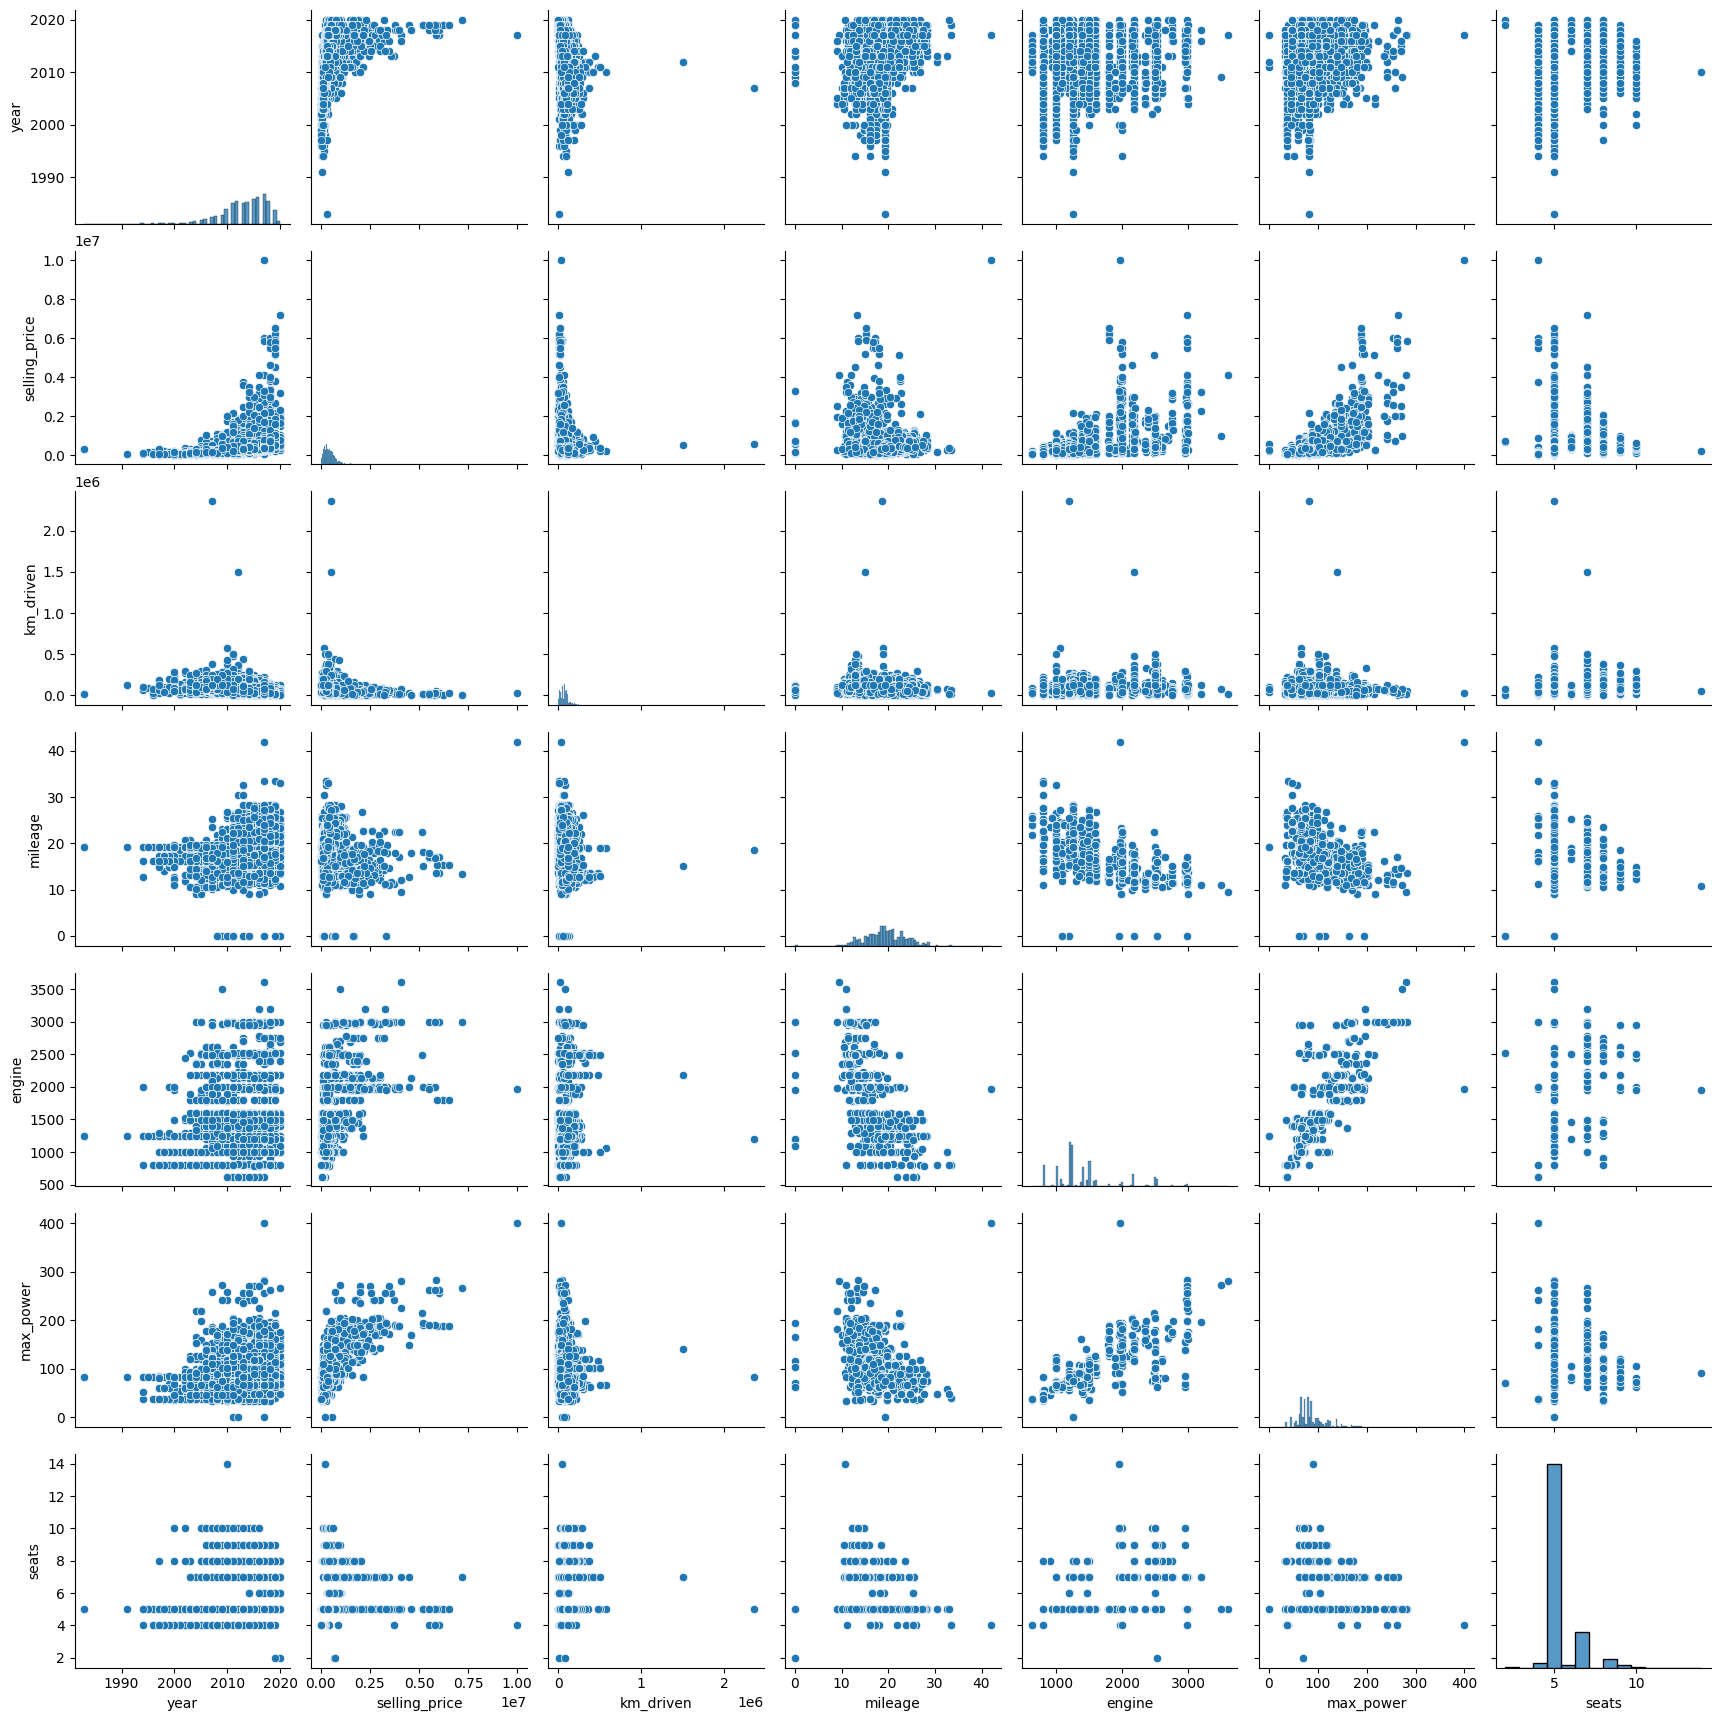

In [60]:
# Выберем все числовые признаки
numeric_features = list(df_train.select_dtypes('number').columns)
sns.pairplot(df_train[numeric_features], )

Можно ли предположить на основе распределений связь признаков с целевой переменной?

Из pairplot графика явно просматриваются следующие взаимосвязи:
1. Стоимость автомобиля (selling price) увеличивается с увеличением года выпуска автомобиля (year)
2. Стоимость автомобиля снижается с ростом величины пробега (km_driven)
3. Стоимость автомобиля увеличивается с увеличением объема двигателя (engine)
4. Стоимость автомобиля увеличивается с увеличением мощности двигателя (max_power)
5. Стоимость автомобиля немного уменьшается с увеличением количества посадочных мест в салоне (seats)

Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

1. Есть небольшая отрицательная корреляция между расходом топлива (mileage) и объемом двигателя (engine), а так же мощностью двигателя (max_power) и числом посадочных мест в салоне (seats)
2. Есть сильная положительная  корреляция между объемом двигателя (engine) и мощностью двигателя (max_power)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [61]:
corr_matrix = df_train[numeric_features].corr()
corr_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


<Axes: >

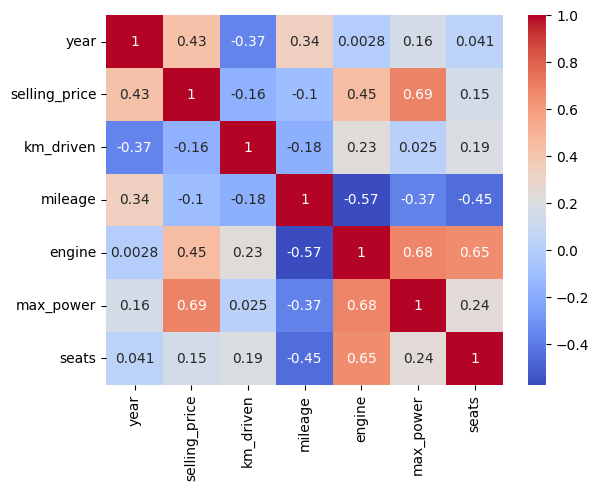

In [62]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Наименее скоррелированы между собой признаки `year` и `engine`
- довольно сильная положительная линейная зависимость наблюдается между признаками:
    - `year` и `selling_price`
    - `year` и `mileage`
    - `selling_price` и `engine`
    - `selling_price` и `max_power`
    - `engine` и `max_power`
    - `engine` и `seats`

Вывод: не все корреляции удалось заметить глядя на pairplot, тепловая карта матрицы корреляций оказалась более информативной

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Мы посмотрели на корреляцию числовых признаков, не не проверили категориальные. Попробуем сделать это при помощи функции associations из библиотеки dython, которая позволяет строить корреляции для:
- двух непрерывных (числовых) признаков при помощи коэффициента корреляции Пирсона
- двух категориальных признаков при помощи V-меры Крамера
- одного непрерывного и одного категориального признака при помощи корреляционного отношения

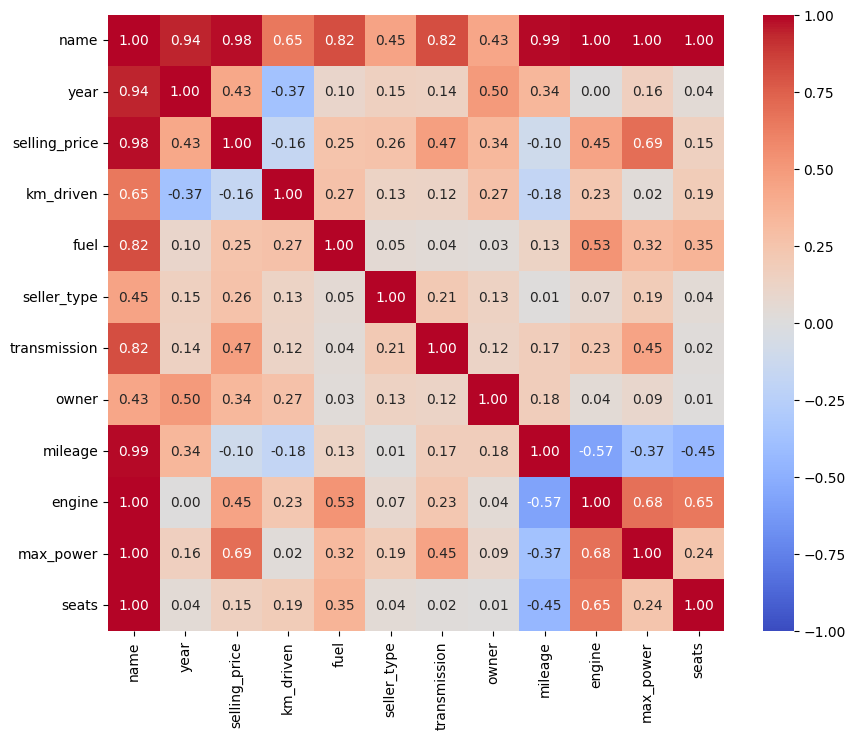

{'corr':                    name      year  selling_price  km_driven      fuel  \
 name           1.000000  0.937962       0.981738   0.652596  0.819150   
 year           0.937962  1.000000       0.427279  -0.368966  0.096259   
 selling_price  0.981738  0.427279       1.000000  -0.164828  0.251507   
 km_driven      0.652596 -0.368966      -0.164828   1.000000  0.269131   
 fuel           0.819150  0.096259       0.251507   0.269131  1.000000   
 seller_type    0.449373  0.153543       0.262785   0.131065  0.047775   
 transmission   0.819010  0.141466       0.468959   0.120338  0.035556   
 owner          0.434359  0.499724       0.335328   0.270682  0.025231   
 mileage        0.989486  0.342172      -0.104458  -0.182245  0.131084   
 engine         0.999816  0.002819       0.447672   0.229766  0.525474   
 max_power      0.998204  0.156648       0.692754   0.024630  0.319589   
 seats          0.997951  0.041178       0.149953   0.192328  0.352948   
 
                seller_type 

In [63]:
from dython.nominal import associations

categorial_features = list(df_train.select_dtypes('object'))
# Вычисляем корреляции категориальных данных для
associations(df_train, nominal_columns=categorial_features, \
              numerical_columns=numeric_features,\
              figsize=(10, 8), cmap='coolwarm')

На визуализации матрицы корреляции можно заметить много корреляций между категориальными и числовыми признаками. Из важного можно отметить 
наличие корреляции между стоимостью автомобиля (`selling_price`) и типом коробки передач (`transmission`)

 

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [64]:
df_train_numeric = df_train[numeric_features]
y_train = df_train_numeric['selling_price']
X_train_numeric = df_train_numeric.drop('selling_price', axis=1)

In [65]:
X_train_numeric

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
6992,2008,191000,17.92,1086,62.10,5
6993,2013,50000,18.90,998,67.10,5
6994,2013,110000,18.50,1197,82.85,5
6995,2007,119000,16.80,1493,110.00,5


Assert не проходит, потому что я переименовал X_train в X_train_numeric

In [68]:
# assert X_train.shape == (5840, 6)

In [69]:
df_test_numeric = df_test[numeric_features]
y_test = df_test_numeric['selling_price']
X_test_numeric = df_test_numeric.drop('selling_price', axis=1)

Здесь assert также не проходит, потому что я переименовал X_test в X_test_numeric

In [39]:
# assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lin_reg = LinearRegression()
lin_reg.fit(X_train_numeric, y_train)

# Получим прогноз модели на обучающей выборке
y_pred = lin_reg.predict(X_train_numeric)
mse = MSE(y_pred=y_pred, y_true=y_train)
r2 = r2_score(y_pred=y_pred, y_true=y_train)
print(f'MSE на обучающей выборке : {mse}')
print(f'R2 на обучающей выборке: {r2}')

# Получим прогноз модели на тестовой выборке
y_pred = lin_reg.predict(X_test_numeric)
mse = MSE(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f'MSE на тестовой выборке : {mse}')
print(f'R2 на тестовой выборке: {r2}')

MSE на обучающей выборке : 116873067751.52162
R2 на обучающей выборке: 0.5922629595849875
MSE на тестовой выборке : 233297548204.61063
R2 на тестовой выборке: 0.5941441219017134


Значение MSE вообще не очень информативно, поскольку оно измеряется в единицах измерения целевой переменной, взятых в квадрате. Тем не менее можно посмотреть на среднее значение целевой переменной в тестовой выборке и сравнить с корнем квадратным из MSE

In [71]:
target_mean = y_test.mean()
print(f'Среднее значение целевой переменной в тестовой выборке: {target_mean}')
print(f'RMSE: {mse ** 0.5}')

Среднее значение целевой переменной в тестовой выборке: 617901.042
RMSE: 483008.84899203514


Видно, что RMSE имеет тот же порядок, что и среднее значение таргета и вообще не намного меньше его, поэтому качество нашей модели, скорее плохое. Об этом же говорит и значение $R^2$=0.59, что значительно ниже 1 

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_numeric_scaled = pd.DataFrame(scaler.transform(X_test_numeric), columns=X_test_numeric.columns)

Проверим, помогла ли стандартизация улучшить качество модели

In [73]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_numeric_scaled, y_train)

y_pred = lin_reg_scaled.predict(X_test_numeric_scaled)

# Получим прогноз модели на обучающей выборке
y_pred = lin_reg_scaled.predict(X_train_numeric_scaled)
mse = MSE(y_pred=y_pred, y_true=y_train)
r2 = r2_score(y_pred=y_pred, y_true=y_train)
print(f'MSE на обучающей выборке : {mse}')
print(f'R2 на обучающей выборке: {r2}')

# Получим прогноз модели на тестовой выборке
y_pred = lin_reg_scaled.predict(X_test_numeric_scaled)
mse = MSE(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f'MSE на тестовой выборке : {mse}')
print(f'R2 на тестовой выборке: {r2}')

MSE на обучающей выборке : 116873067751.52162
R2 на обучающей выборке: 0.5922629595849875
MSE на тестовой выборке : 233297548204.6033
R2 на тестовой выборке: 0.5941441219017262


Видим, что качество предсказания, фактически, не изменилось

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [74]:
for i, feature in enumerate(X_train_numeric_scaled.columns):
    print(feature, ' '*(10-len(feature)), '|', lin_reg_scaled.coef_[i])

year        | 152843.26235772425
km_driven   | -44148.047511036595
mileage     | 28781.08659474844
engine      | 61176.857149987365
max_power   | 322779.7032358398
seats       | -23220.570226201406


Судя по величине коэффициента, самым информативным признаком оказалась мощность двигателя (`max_power`).
Вообще коэффициенты получились весьма большими, что, вероятно, свидетельствует о переобучении модели

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [75]:
from sklearn.linear_model import Lasso

# alpha = 100000
lasso = Lasso(alpha=1)
lasso.fit(X_train_numeric_scaled, y_train)

# Получим прогноз модели на обучающей выборке
y_pred = lasso.predict(X_train_numeric_scaled)
mse = MSE(y_pred=y_pred, y_true=y_train)
r2 = r2_score(y_pred=y_pred, y_true=y_train)
print(f'MSE на обучающей выборке : {mse}')
print(f'R2 на обучающей выборке: {r2}')

# Получим прогноз модели на тестовой выборке
y_pred = lasso.predict(X_test_numeric_scaled)
mse = MSE(y_pred=y_pred, y_true=y_test)
r2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f'MSE на тестовой выборке : {mse}')
print(f'R2 на тестовой выборке: {r2}')

MSE на обучающей выборке : 116873067761.63504
R2 на обучающей выборке: 0.5922629595497046
MSE на тестовой выборке : 233298219170.76022
R2 на тестовой выборке: 0.5941429546560312


In [76]:
for i, feature in enumerate(X_train_numeric_scaled.columns):
    print(feature, ' '*(10-len(feature)), '|', lasso.coef_[i])

year        | 152843.08385345194
km_driven   | -44146.91853784643
mileage     | 28779.204084991885
engine      | 61172.02578008206
max_power   | 322780.58619707805
seats       | -23217.69327310848


После применения Lasso (L1) регуляризации вообще ничего не изменилось. Никакие веса тоже не занулились. Вероятно из-за того, что коэффициент регуляризции alpha, установленный по умолчанию (alpha=1.0), слишком мал, чтобы что-то существенно изменить.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [77]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report

model = Lasso() # выбираем модель
folds = KFold(n_splits=10)  # разбиение на 10 фолдов
# Определим сетку параметров для нашей модели
param_grid = {'alpha': np.array(np.arange(0.1, 10000, 20))}

gs_lasso = GridSearchCV(estimator=model, param_grid=param_grid, cv=folds, scoring='r2')

gs_lasso.fit(X_train_numeric_scaled, y_train)

# Вывод результатов
print("Лучшие параметры:", gs_lasso.best_params_)
print("Лучший результат R2 на обучающей выборке:", gs_lasso.best_score_)

# Оценка на тестовых данных
gs_lasso_best_model = gs_lasso.best_estimator_
test_r2 = r2_score(y_test, gs_lasso_best_model.predict(X_test_numeric_scaled))
print("R2 на тестовой выборке:", test_r2)

Лучшие параметры: {'alpha': np.float64(9980.1)}
Лучший результат R2 на обучающей выборке: 0.572723621337325
R2 на тестовой выборке: 0.5816140589784129


Посмотрим на значения весов в лучшей модели

In [78]:
for i, feature in enumerate(X_train_numeric_scaled.columns):
    print(feature, ' '*(10-len(feature)), '|', gs_lasso_best_model.coef_[i])

year        | 151891.064409494
km_driven   | -32748.43430922018
mileage     | 9286.372767996807
engine      | 17891.000029811294
max_power   | 329205.18887708
seats       | -0.0


`Вопрос:` Сколько грид-сёрчу пришлось обучать моделей?\
`Ответ:` поскольку мы разбивали обучающую выборку на 10 фолдов и перебирали 50 возможных значений гиперпараметра `alpha`, то в общей сложности грид-серч обучил 500 моделей

`Вопрос:` Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?\
`Ответ:` Коэффициент регуляризации у лучшей модели равен 5420.1. При регуляризации занулился вес при признаке `seats`, но видно, что все равно веса очень большие по модулю, что свидетельствует о переобучении модели

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [79]:
from sklearn.linear_model import ElasticNet

model = ElasticNet() # выбираем модель
folds = KFold(n_splits=10)  # разбиение на 10 фолдов
# Определим сетку параметров для нашей модели
param_grid = {'alpha': np.array(np.arange(10, 10000, 100)),
              'l1_ratio': np.array(np.arange(0.1, 1, 0.1))}

gs_elastic_net = GridSearchCV(estimator=model, param_grid=param_grid, cv=folds, scoring='r2')

gs_elastic_net.fit(X_train_numeric_scaled, y_train)

# Вывод результатов
print("Лучшие параметры:", gs_elastic_net.best_params_)
print("Лучший результат R2 на обучающей выборке:", gs_elastic_net.best_score_)

# Оценка на тестовых данных
gs_elastic_net_best_model = gs_elastic_net.best_estimator_
test_r2 = r2_score(y_test, gs_elastic_net_best_model.predict(X_test_numeric_scaled))
print("R2 на тестовой выборке:", test_r2)

Лучшие параметры: {'alpha': np.int64(10), 'l1_ratio': np.float64(0.9)}
Лучший результат R2 на обучающей выборке: 0.5031728506263098
R2 на тестовой выборке: 0.41909112809667526


/home/neuralist/DS&ML/HSE_AI_master/HSE_AI_ML_course_hw_01/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [80]:
for i, feature in enumerate(X_train_numeric_scaled.columns):
    print(feature, ' '*(10-len(feature)), '|', gs_elastic_net_best_model.coef_[i])

year        | 95145.65380112651
km_driven   | -36549.757154033134
mileage     | 1775.2789000747098
engine      | 71920.3147338861
max_power   | 154300.35888723595
seats       | -179.53148638880492


`Вопрос:` Сколько грид-сёрчу пришлось обучать моделей?\
`Ответ:` поскольку мы разбивали обучающую выборку на 10 фолдов и перебирали 100 * 9 возможных значений двух гиперпараметров `alpha`, то в общей сложности грид-серч обучил 9000 моделей

`Вопрос:` Какой коэффициент регуляризации у лучшей из перебранных моделей?\
`Ответ:` Коэффициент регуляризации у лучшей модели равен 10, при этом доля L_1 регуляризации равна 0.9. При регуляризации веса не занулились (так как присутствует доля L2 регуляризации), но веса при признаках снизились, хотя по-прежнему очень большие

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [81]:
df_train_cat = df_train[categorial_features]
df_train_cat

,name,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
3,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
4,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,Petrol,Individual,Manual,First Owner
6993,Maruti Wagon R VXI BS IV with ABS,Petrol,Individual,Manual,Second Owner
6994,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner
6995,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner


Не будем удалять столбце name, а попробуем его предобработать. Попробуем вытащить из каждой строки только марку и модель автомобиля, которые записаны в первых двух словах каждой строки, и посмотрим сколько всего категорий у нас получится

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [82]:
def name_processing(x):
    return ' '.join(x.split()[:2])

X_train_cat = df_train.drop('selling_price', axis=1)
X_train_cat['name'] = df_train['name'].apply(name_processing)
X_train_cat

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
6993,Maruti Wagon,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
6994,Hyundai i20,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
6995,Hyundai Verna,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


Теперь посмотрим, сколько различных категорий у нас получилось в столбце `name`

In [83]:
X_train_cat['name'].value_counts()

name
Maruti Swift         558
Maruti Alto          316
Hyundai i20          247
Maruti Wagon         205
Toyota Innova        160
                    ... 
Mercedes-Benz GLC      1
Renault Scala          1
Ambassador Grand       1
Volvo S90              1
Maruti S-Presso        1
Name: count, Length: 205, dtype: int64

Очевидно, 205 категорий - это слишком много. Объединим редкие категории в одну под названием `rare`

In [84]:
for i in range(len(X_train_cat['name'].values)):
        if X_train_cat[X_train_cat['name'] == X_train_cat['name'].values[i]]['name'].count() < 100:
            X_train_cat['name'].values[i] = 'rare' 

In [85]:
X_train_cat['name'].value_counts()[:18] # Теперь получилось 18 категорий

name
rare                2854
Maruti Swift         558
Maruti Alto          316
Hyundai i20          247
Maruti Wagon         205
Toyota Innova        160
Mahindra Bolero      156
Hyundai Verna        149
Honda City           141
Ford Figo            135
Hyundai Grand        129
Mahindra Scorpio     128
Tata Indica          120
Maruti Ertiga        113
Mahindra XUV500      111
Hyundai i10          110
Hyundai Santro       108
Tata Indigo          100
Name: count, dtype: int64

Assert не проходит, т.к. мы не стали удалять столбец `name` и у нас 11 столбцов вместо 10

In [56]:
# assert X_train_cat.shape == (5840, 10)

In [86]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,18,4,3,2,5
top,rare,Diesel,Individual,Manual,First Owner
freq,2854,3177,5223,5336,3603


Теперь проделаем то же самое с тестовой выборкой

In [87]:
X_test_cat = df_test.drop('selling_price', axis=1)
X_test_cat['name'] = df_test['name'].apply(name_processing)
# Объединять категории для тестовойй части в одну не будем, просто проигнорируем новые категории при one-hot кодировании

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [88]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', dtype='byte') # Установим параметр drop, чтобы избежать мультиколлинеарности

# Добавим к категориальным признакам признак seats и закодируем их при помощи OHE
X_train_cat_encoded = encoder.fit_transform(X_train_cat[categorial_features + ['seats']])
X_test_cat_encoded = encoder.transform(X_test_cat[categorial_features + ['seats']])

# Преобразуем результат кодирования в датафрейм
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(),
                                   columns=encoder.get_feature_names_out(categorial_features + ['seats']), 
                                   index=X_train_cat.index)

X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(),
                                  columns=encoder.get_feature_names_out(categorial_features+ ['seats']),
                                  index=X_test_cat.index)

/home/neuralist/DS&ML/HSE_AI_master/HSE_AI_ML_course_hw_01/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [89]:
X_test_cat_encoded.head()

,name_Honda City,name_Hyundai Grand,name_Hyundai Santro,name_Hyundai Verna,name_Hyundai i10,name_Hyundai i20,name_Mahindra Bolero,name_Mahindra Scorpio,name_Mahindra XUV500,name_Maruti Alto,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Объединим категориальные и числовые части датасетов
X_train_full = pd.concat([X_train_numeric.drop('seats', axis=1), X_train_cat_encoded], axis=1)
X_test_full = pd.concat([X_test_numeric.drop('seats', axis=1), X_test_cat_encoded], axis=1)

# Поскольку признак seats стал категориальным, то переопределим список числовых признаков
numeric_features = X_train_full.select_dtypes(['int64', 'float64']).columns

# Преобразование числовых столбцов
numerical_transformer = Pipeline(steps=[    
    ('scaler', StandardScaler())  # Масштабирование признаков
])

# Объединяем преобразования с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train_full[numeric_features].columns)])

#Полный пайплайн с линейной регрессией
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Настроим сетку для перебора гиперпараметров
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100],  
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'regressor__max_iter': [500, 1000, 2000, 5000]}

folds = KFold(n_splits=10)  # разбиение на 10 фолдов

# Настройка GridSearchCV
gs_ridge = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=folds,                       
    scoring='r2'                 # Используем метрику R2
 )

# Обучаем модели с различными гиперпараметрами
gs_ridge.fit(X_train_full, y_train)

# Вывод результатов на обучающей выборке
print("Лучшие параметры:", gs_ridge.best_params_)
print("Лучший результат R2 на обучающей выборке:", gs_ridge.best_score_)

# Оценка на тестовых данных
gs_ridge_best_model = gs_ridge.best_estimator_
test_r2 = r2_score(y_test, gs_ridge_best_model.predict(X_test_full))
print("R2 на тестовой выборке:", test_r2)

Лучшие параметры: {'regressor__alpha': 100, 'regressor__max_iter': 500, 'regressor__solver': 'saga'}
Лучший результат R2 на обучающей выборке: 0.5692084032211435
R2 на тестовой выборке: 0.5870270501316325


Вывод
---
Что бы я ни делал, значение метрики R2 не удалось улучшить даже на 0.1, а качество модели на обучающей выборке снизилось с 0.59 до -0.2
Что было сделано в итоге:
- признак `name` "упакован" в 18 отдельных категорий
- стандартизованы числовые признаки
- закодированы категориальные признаки + признак `seats`
- опробована линейная регресси с L2 регуляризацией и различными комбинациями гиперпараметров

При всем этом значение метрики R2 ровно такое же, как и при использовании простой линейной регрессии
- без регуляризации
- без категориальных признаков
- без нормализации вещественных признаков

Вероятно, где-то в коде допущена ошибка, но я не могу ее обнаружить

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [91]:
def business_metric(y_true, y_pred):
    good_predictions = np.where((0.9 * y_true <= y_pred) & (y_pred <= 1.1 * y_true), 1, 0).sum()
    return good_predictions/len(y_true)

Теперь применим созданную бизнес-метрику ко всем использованным ранее моделям:
1. Линейная регрессия без регуляризации на числовых признаках без стандартизации
2. Линейная регрессия с Lasso регуляризацией на числовых признаках со стандартизацией
3. Линейная регрессия с Lasso регуляризацией на числовых признаках со стандартизацией и подборов гиперпараметров через GridSearchCV
4. Линейная регрессия с Elastic Net регуляризацией на числовых признаках со стандартизацией
5. Линейная регрессия с Ridge регуляризацией на числовых и категориальных признаках

In [96]:
# Создаем свой скорер для нашей бизнес-метрики и используем ее для оценки качества модели

models = [lin_reg, lasso, gs_lasso_best_model, gs_elastic_net_best_model, gs_ridge_best_model]
model_desc = ['линейная регрессия без регуляризации на числовых признаках без стандартизации (задание 9)',
              'линейная регрессии с Lasso на числовых признаках со стандартизацией (задание 12)',
              'линейная регрессии с Lasso на числовых признаках со стандартизацией и подбором гиперпараметров (задание 13)',
              'линейная регрессии с Elastic Net на числовых признаках со стандартизацией и подбором гиперпараметров (задание 13)',
              'линейная регрессии с Ridge на числовых и категориальных признаках (задание 16)']


datasets = [X_test_numeric, X_test_numeric_scaled, X_test_numeric_scaled, X_test_numeric_scaled, X_test_full]
for model, model_desc, X in list(zip(models, model_desc, datasets)):
    score = business_metric(y_test, model.predict(X))
    print(f"Значение бизнес-метрики {model_desc}: {score}")

Значение бизнес-метрики линейная регрессия без регуляризации на числовых признаках без стандартизации (задание 9): 0.227
Значение бизнес-метрики линейная регрессии с Lasso на числовых признаках со стандартизацией (задание 12): 0.227
Значение бизнес-метрики линейная регрессии с Lasso на числовых признаках со стандартизацией и подбором гиперпараметров (задание 13): 0.235
Значение бизнес-метрики линейная регрессии с Elastic Net на числовых признаках со стандартизацией и подбором гиперпараметров (задание 13): 0.222
Значение бизнес-метрики линейная регрессии с Ridge на числовых и категориальных признаках (задание 16): 0.244


Наилучший результат с точки зрения бизнес-метрики показала модель, обученная на числовых и категориальных признаках c использованием Ridge регуляризации и перебором гиперпараметров (модель из задания 16)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Задание 18 я не смог выполнить. Код для самого сервиса написал, но не справился с тем, чтобы вся предобработка сырых данных проводилась автоматически в рамках одного пайплана, который бы потом я мог экспортировать в FastAPI приложение. В итоге получилось, что датасет, который z подаю на вход модели, отличается от "сырого", и его столбцы отличаются от прописанных в шаблоне для FastAPI 

In [ ]:
import joblib

joblib.dump(gs_ridge_best_model , 'model.pkl')

Для тестирования сервиса подготовим .JSON файл с описанием одного объекта и .csv файл с описанием нескольких объектов из тестовой выборки

In [ ]:
test_item = X_test_full.iloc[0, :]
type(test_item)

In [67]:
import json

# Готовим .JSON файл с одним объектом из тестовой выборки
json_data_dict = test_item.to_dict()
with open("test_item.json", "w") as file:
    json.dump(json_data_dict, file, indent=4)  
# Готовим .csv файл с 20 объектами из тестовой выборки
test_items = X_test_full.iloc[1:21, :]
test_items.to_csv('test_items.csv')

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

